In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
MD = pd.read_csv('/Users/rajeshkannan/Desktop/Mcdonalds_dataset.csv')
MD

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


## Exploring Data

In [39]:
MD.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [41]:
MD.info

<bound method DataFrame.info of      yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gen

In [9]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [42]:
MD.shape

(1453, 15)

In [43]:
MD.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [44]:
MD.isnull().sum().sum()

0

In [45]:
MD.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [46]:
# getting unique vlaues in the dataset

for col in MD.columns:
    unique_values = MD[col].unique()
    print(f'unique values for {col}: {unique_values}')

unique values for yummy: ['No' 'Yes']
unique values for convenient: ['Yes' 'No']
unique values for spicy: ['No' 'Yes']
unique values for fattening: ['Yes' 'No']
unique values for greasy: ['No' 'Yes']
unique values for fast: ['Yes' 'No']
unique values for cheap: ['Yes' 'No']
unique values for tasty: ['No' 'Yes']
unique values for expensive: ['Yes' 'No']
unique values for healthy: ['No' 'Yes']
unique values for disgusting: ['No' 'Yes']
unique values for Like: ['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
unique values for Age: [61 51 62 69 49 55 56 23 58 32 53 28 65 54 67 34 31 47 37 41 36 50 39 35
 20 24 44 40 48 38 57 60 66 42 26 52 29 25 22 45 18 68 43 21 27 33 63 46
 59 19 64 70 30 71]
unique values for VisitFrequency: ['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
unique values for Gender: ['Female' 'Male']


In [47]:
# changin the values of YES and NO to 1 and 0 
MD_x = np.array(df.iloc[:, :11].replace({"Yes":1, "No":0}))
MD_x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [48]:
col_means = np.round(np.mean(MD_x, axis=0), 2)
print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [67]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(MD_x)

print(pca.explained_variance_ratio_)
print(pca.components_)


[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03

In [71]:

pca = PCA().fit(MD_x)

# Print the summary
print("Importance of each component:", pca.explained_variance_ratio_)
print("\nCumulative proportion of variance explained:", np.cumsum(pca.explained_variance_ratio_))
print("\nRotation matrix (PC loadings):\n", pca.components_)


Importance of each component: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative proportion of variance explained: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]

Rotation matrix (PC loadings):
 [[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089

Projection axes (PC loadings):
 [[-0.40695508 -0.30882741]
 [ 0.28261487 -0.04568172]
 [-0.25958798 -0.31715142]
 [ 0.02623694 -0.00942396]
 [ 0.34685741 -0.43714795]
 [-0.12491568  0.18896641]
 [ 0.15987822 -0.66181418]
 [ 0.01658651  0.15003253]
 [-0.19534072 -0.33653941]
 [ 0.69144587  0.02883138]
 [-0.0918508   0.02146034]]


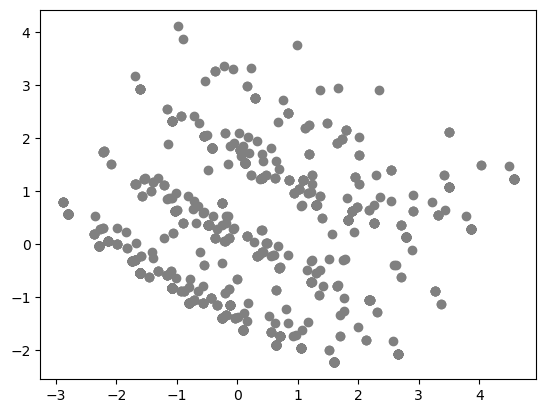

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming MD_x is a matrix or dataframe
# Standardize the data
scaler = StandardScaler()
MD_x_std = scaler.fit_transform(MD_x)

# Perform PCA analysis
pca = PCA()
MD_pca = pca.fit_transform(MD_x_std)

# Visualize the results
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')

# Get the rotation matrix (PC loadings)
rot_mat = pca.components_

# Get the projection axes
proj_axes = rot_mat[:, :2]

# Print the projection axes
print("Projection axes (PC loadings):\n", proj_axes)


## Extracting Segments

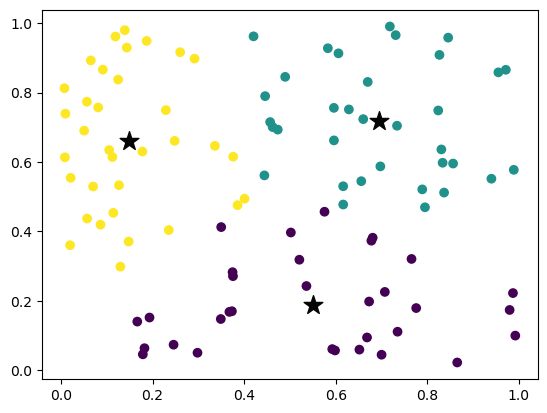

In [83]:
from sklearn.cluster import KMeans
X = np.random.rand(100,2)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], marker='*', s=200, c='#050505')
plt.show()

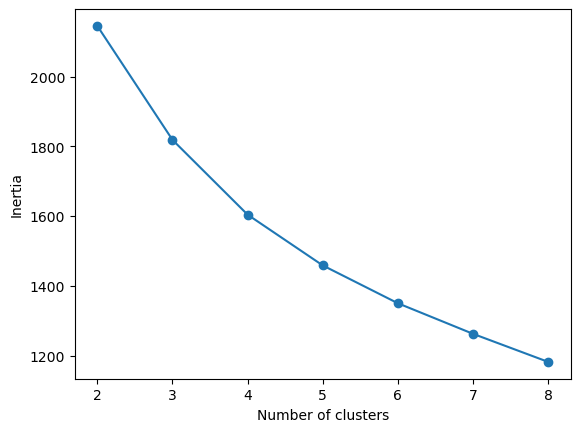

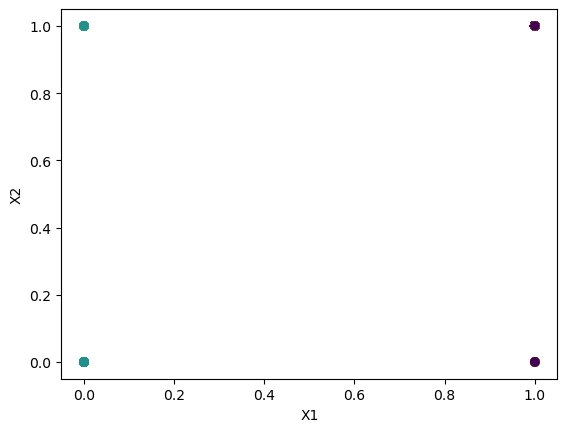

In [87]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)
kmeans_models = []
k_range = range(2,9)

for k in k_range:
    kmeans_models.append(KMeans(n_clusters=k, n_init=10).fit(MD_x))

# Plot elbow curve
inertias = [model.inertia_ for model in kmeans_models]
plt.plot(k_range, inertias, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Choose number of clusters based on elbow curve
k = 3

# Fit final KMeans model
kmeans_final = KMeans(n_clusters=k, n_init=10).fit(MD_x)

# Plot cluster assignments
plt.scatter(MD_x[:, 0], MD_x[:, 1], c=kmeans_final.labels_)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


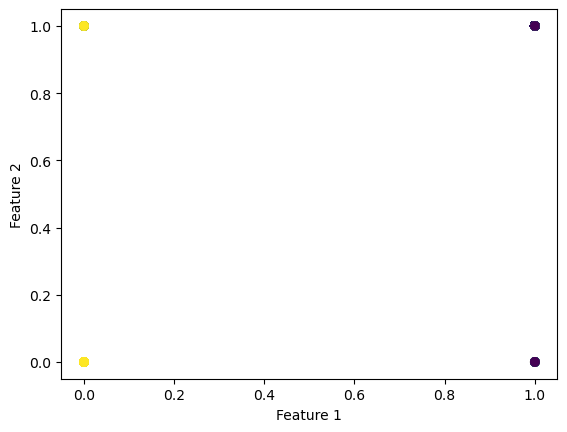

In [88]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming MD_x is a matrix or dataframe
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(MD_x)

# Plot the clustering results
plt.scatter(MD_x[:,0], MD_x[:,1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
